In [8]:
# Bibliotecas
# Manipulação de dados
import pandas as pd
import numpy as np

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# SkLearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve

# Setando configurações de plot
plt.style.use('ggplot')

In [7]:
df = pd.read_csv('KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


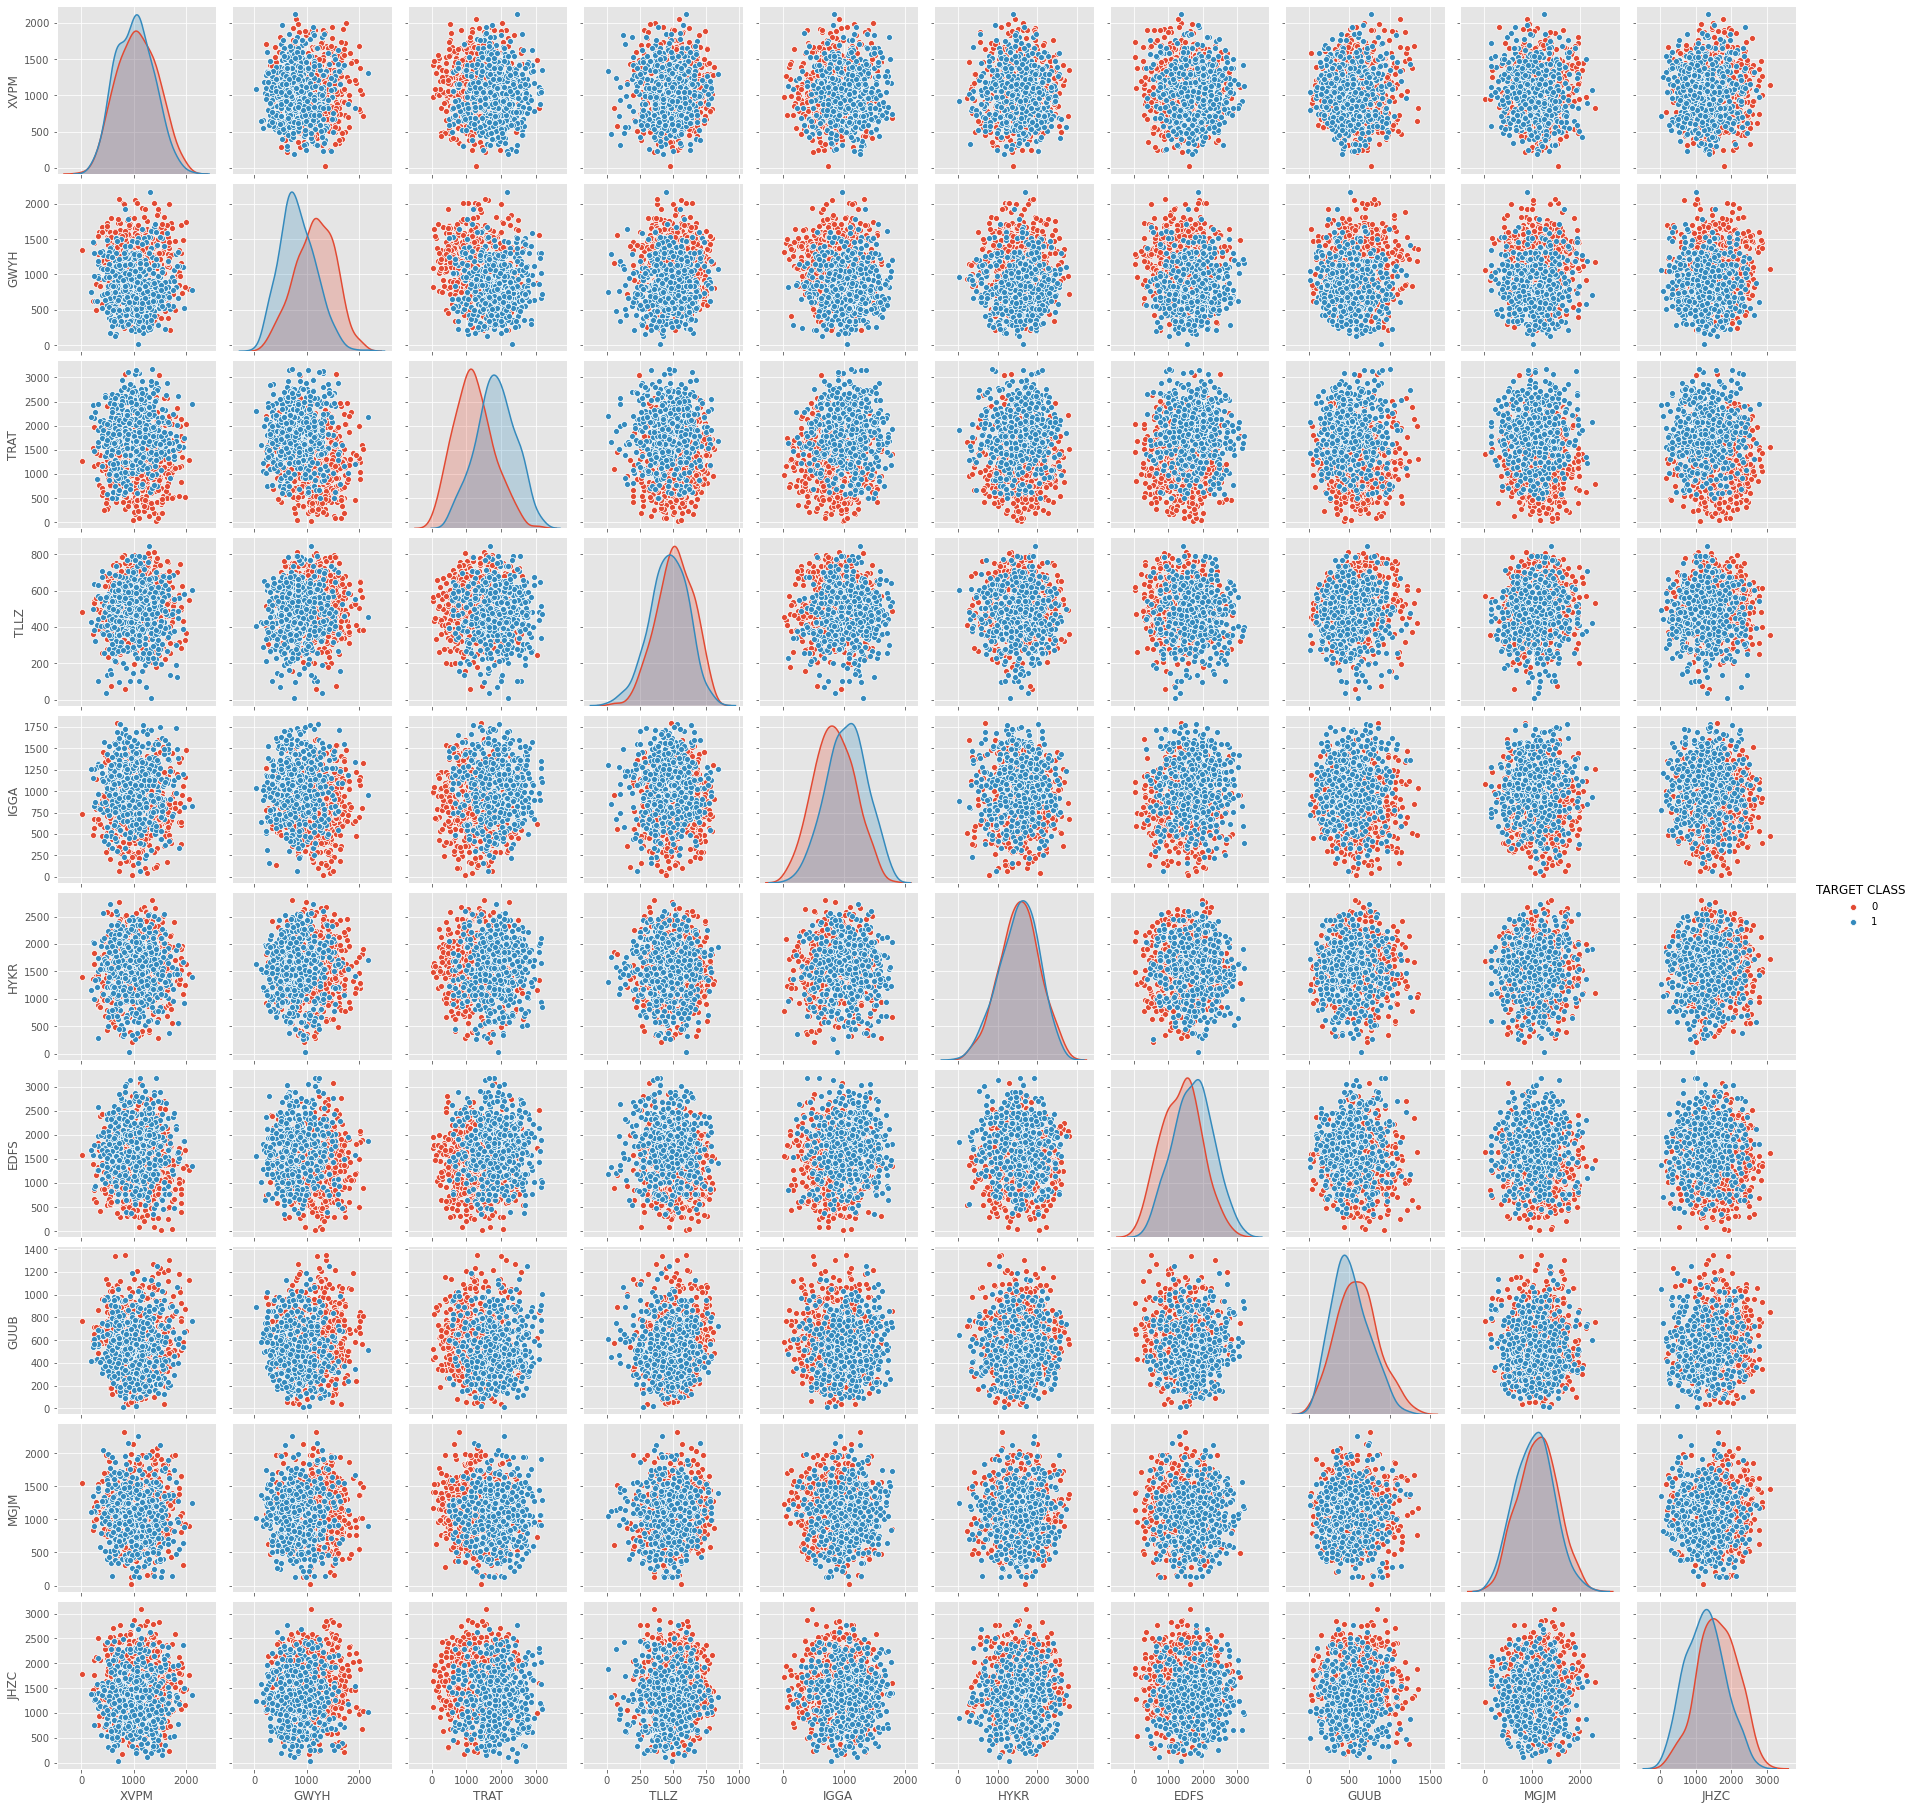

In [9]:
sns.pairplot(df, hue='TARGET CLASS')

# Modelo

In [10]:
# Definindo Scaler
scaler = StandardScaler()

In [13]:
# Fitando scaler, transformando e dividindo X e y
X = scaler.fit_transform(df.iloc[:,:-1])
y = df['TARGET CLASS']

In [19]:
# Verificando resultado
pd.DataFrame(X, columns=df.iloc[:,:-1].columns)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


In [41]:
# Dividindo em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Usando nosso K default (5)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.78

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       146
           1       0.80      0.77      0.78       154

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [46]:
print(confusion_matrix(y_test, y_pred))

[[116  30]
 [ 36 118]]


In [47]:
# Fitando modelo e testando vários K's

n = 50
resultado = []
resultado_err = []

for k in range(1,n):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    resultado.append(knn.score(X_test, y_test))
    resultado_err.append(np.mean(y_pred != y_test))

In [48]:
# Melhor valor de K pela acurácia
resultado.index(max(resultado))

20

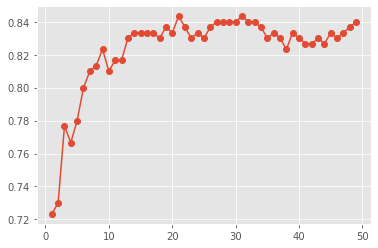

In [49]:
plt.plot(range(1,n), resultado, marker='o')

In [50]:
# Menor valor de erro
resultado_err.index(min(resultado_err))

20

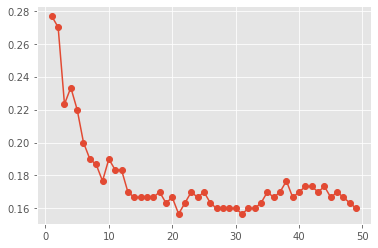

In [51]:
plt.plot(range(1,n), resultado_err, marker='o')

In [52]:
# Escolhendo K = 20

knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.8333333333333334

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.87      0.79      0.83       154

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



In [54]:
print(confusion_matrix(y_test, y_pred))

[[128  18]
 [ 32 122]]


In [55]:
# Houve melhora geral escolhendo K = 20 comparado ao K = 5